In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\digitdata\\train.csv")
train.head()
test=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\digitdata\\test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#generating xtrain,ytrain from train data
xtrain=train.drop(columns="label").values
ytrain=train["label"].values
xtest=test.values

In [10]:
xtrain.shape

(42000, 784)

In [11]:
ytrain.shape

(42000,)

In [12]:
xtest.shape

(28000, 784)

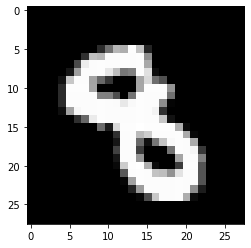

In [13]:
plt.imshow(xtrain[67].reshape(28,28),cmap="gray")

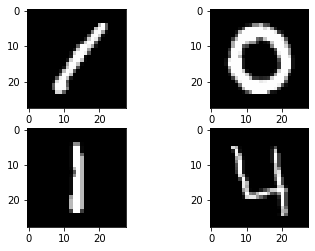

In [17]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(xtrain[i].reshape(28,28),cmap="gray")

### Scaling of data with Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
sc_xtrain=sc.transform(xtrain)
sc_test=sc.transform(xtest)

### PCA transformation of Data

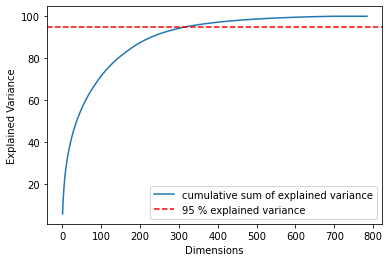

In [19]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(sc_xtrain)
val=np.cumsum(pca.explained_variance_ratio_)*100
plt.plot(range(1,len(val)+1),val,label="cumulative sum of explained variance")
plt.axhline(y=95,color="r",linestyle="--",label="95 % explained variance")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.legend()

In [20]:
pca=PCA(n_components=0.95)
pca.fit(sc_xtrain)
pca_xtrain=pca.transform(sc_xtrain)
pca_xtest=pca.transform(sc_test)
print("Selected Components :",pca.n_components_)

Selected Components : 320


### Visualization data before PCA and After PCA

Text(0.5, 1.0, 'Data After PCA')

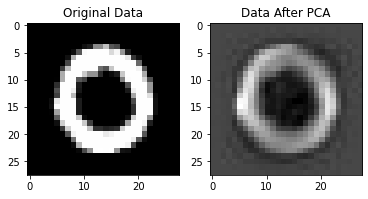

In [21]:
data_point=xtrain[1].reshape(28,28)
pca_data_point=pca.inverse_transform(pca_xtrain[1]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(data_point,cmap="gray")
plt.title("Original Data")
plt.subplot(1,2,2)
plt.imshow(pca_data_point,cmap="gray")
plt.title("Data After PCA")